In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
df = pd.read_csv(r"C:\Users\noorh\Downloads\final_internship_data.csv")  # غيّر الاسم حسب الملف بتاعك
print(df.shape)
print("\nMissing values:\n", df.isnull().sum())

(500000, 26)

Missing values:
 User ID              0
User Name            0
Driver Name          0
Car Condition        0
Weather              0
Traffic Condition    0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    5
dropoff_latitude     5
passenger_count      0
hour                 0
day                  0
month                0
weekday              0
year                 0
jfk_dist             5
ewr_dist             5
lga_dist             5
sol_dist             5
nyc_dist             5
distance             5
bearing              5
dtype: int64


C:\Users\noorh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


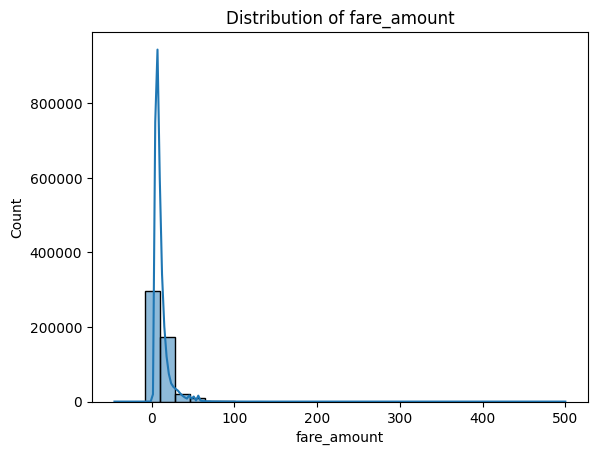

C:\Users\noorh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


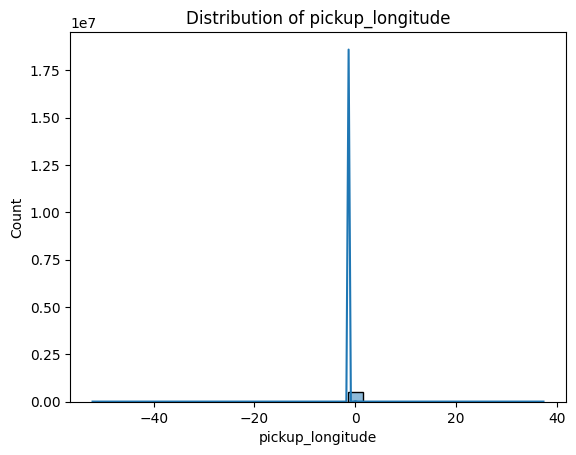

C:\Users\noorh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


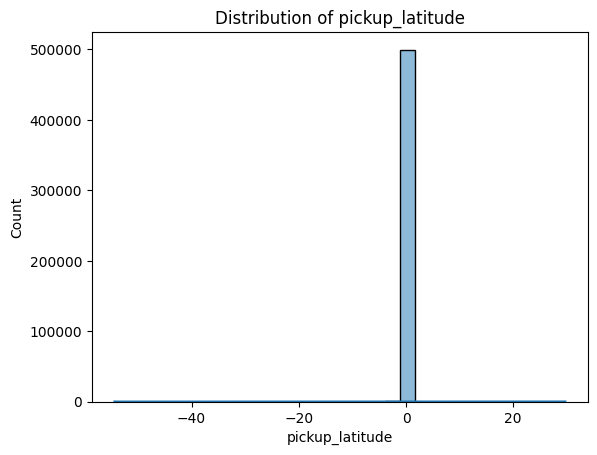

C:\Users\noorh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


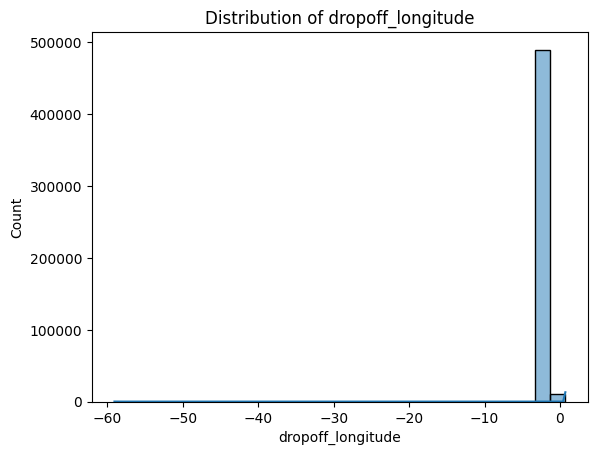

C:\Users\noorh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


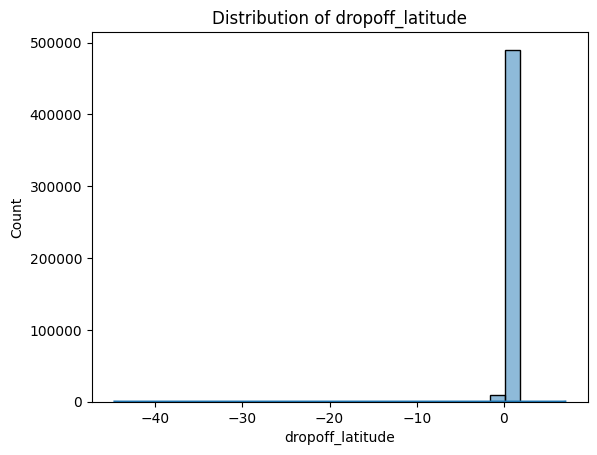

C:\Users\noorh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


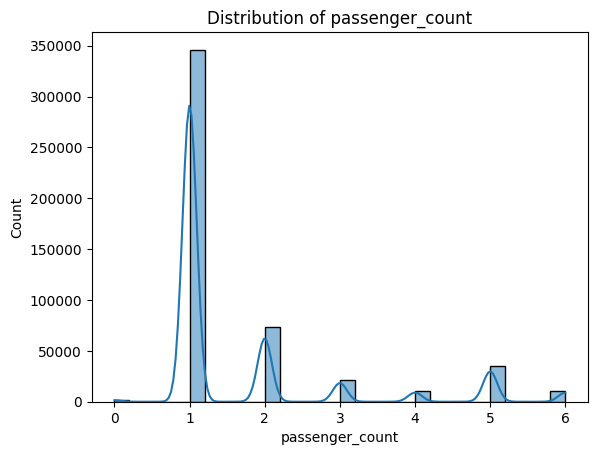

C:\Users\noorh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


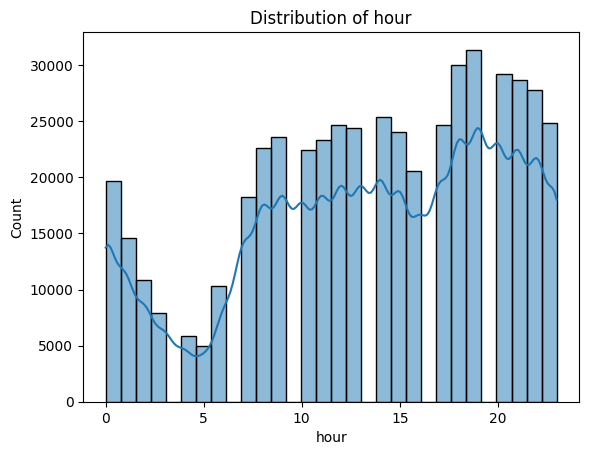

C:\Users\noorh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


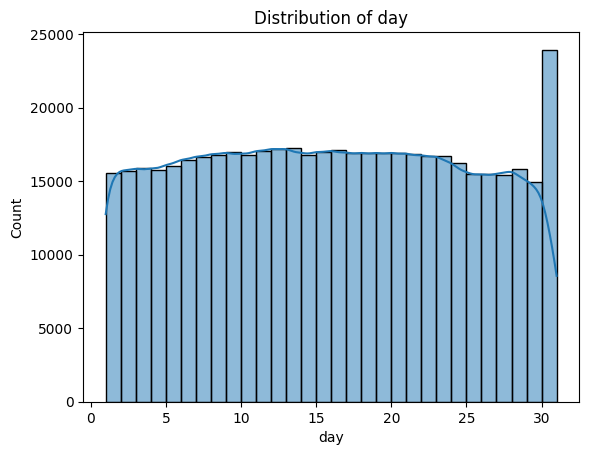

C:\Users\noorh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


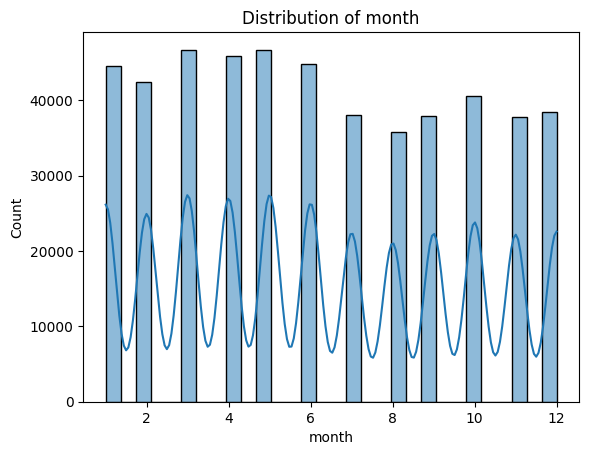

C:\Users\noorh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


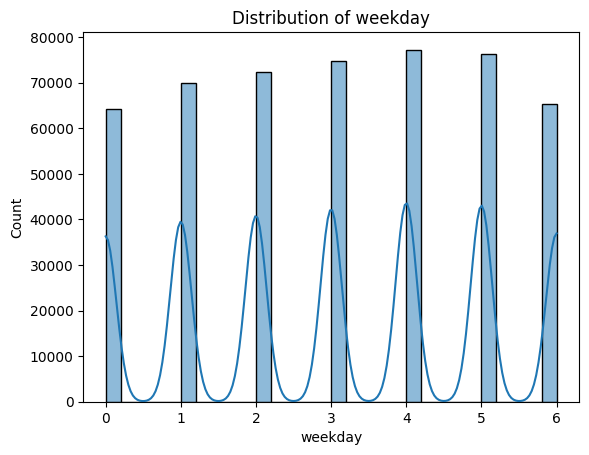

C:\Users\noorh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


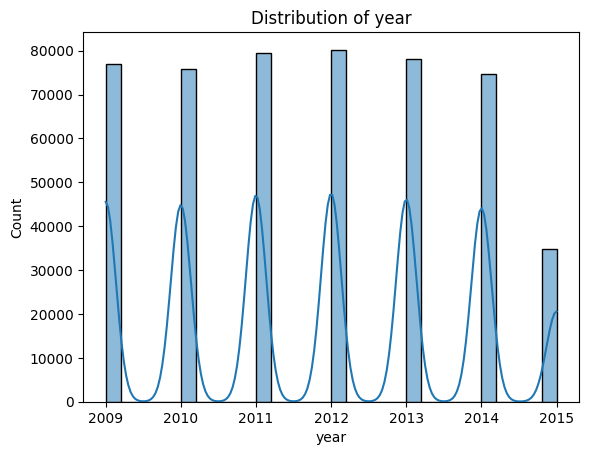

C:\Users\noorh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


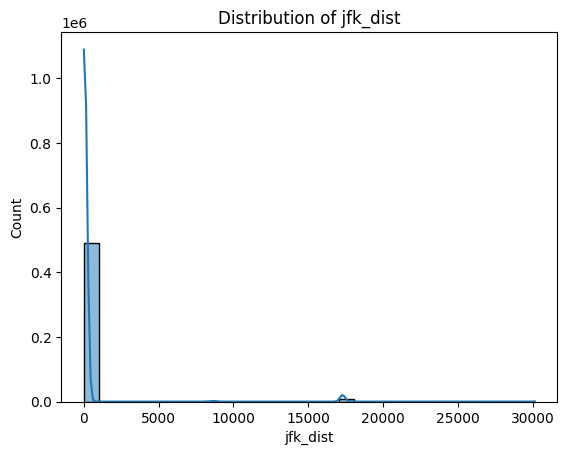

C:\Users\noorh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


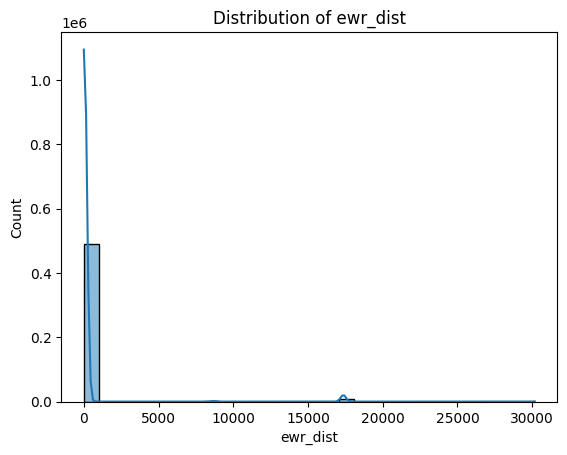

C:\Users\noorh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


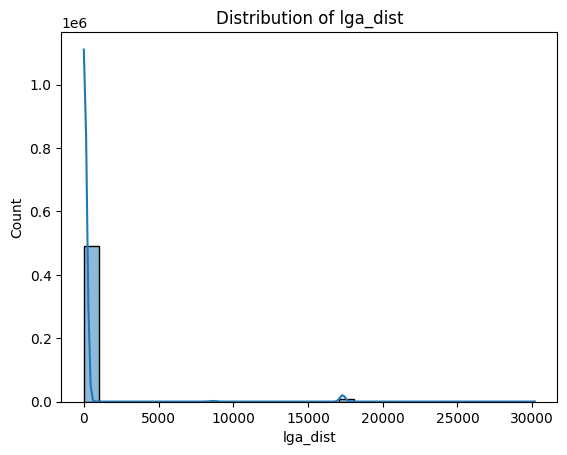

C:\Users\noorh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


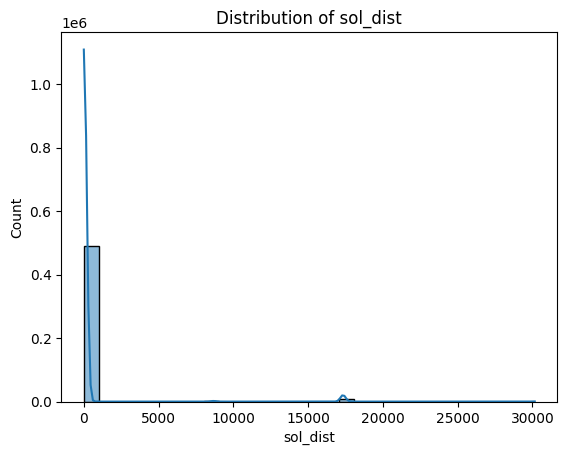

C:\Users\noorh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


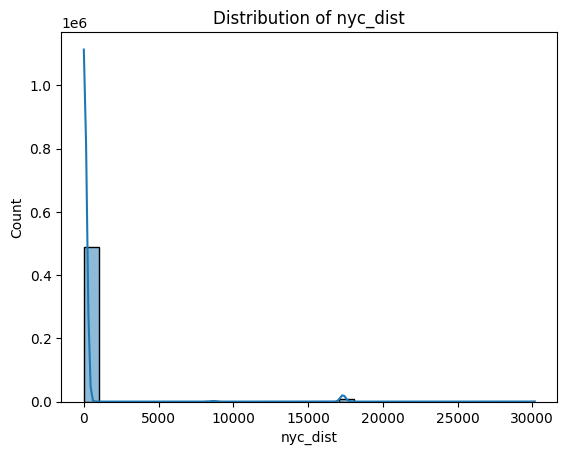

C:\Users\noorh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


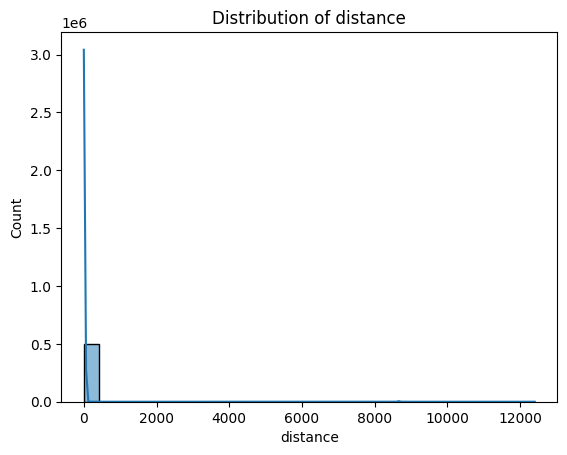

C:\Users\noorh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


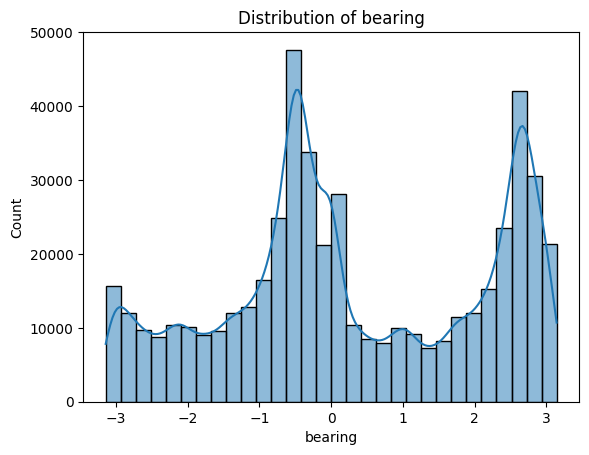

In [53]:
numeric_features = df.select_dtypes(include=[np.number]).columns.tolist()

# رسم التوزيع لكل متغير عددي
for col in numeric_features:
    plt.figure()
    sns.histplot(df[col].dropna(), kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

In [54]:

numeric_columns = df.select_dtypes(include=[np.number]).columns
skewness_values = df[numeric_columns].skew()
print(skewness_values.sort_values(ascending=False))

distance              22.987800
jfk_dist               7.167929
lga_dist               7.167155
nyc_dist               7.165368
sol_dist               7.165139
ewr_dist               7.164582
fare_amount            4.898275
passenger_count        1.973674
month                  0.110436
year                   0.066356
day                    0.019693
bearing               -0.021611
weekday               -0.041363
hour                  -0.435014
pickup_longitude     -14.005788
dropoff_longitude    -44.819414
dropoff_latitude    -100.306908
pickup_latitude     -108.093831
dtype: float64


In [55]:
highly_skewed = skewness_values[abs(skewness_values) > 1]
print("Highly skewed columns:\n", highly_skewed)

Highly skewed columns:
 fare_amount            4.898275
pickup_longitude     -14.005788
pickup_latitude     -108.093831
dropoff_longitude    -44.819414
dropoff_latitude    -100.306908
passenger_count        1.973674
jfk_dist               7.167929
ewr_dist               7.164582
lga_dist               7.167155
sol_dist               7.165139
nyc_dist               7.165368
distance              22.987800
dtype: float64


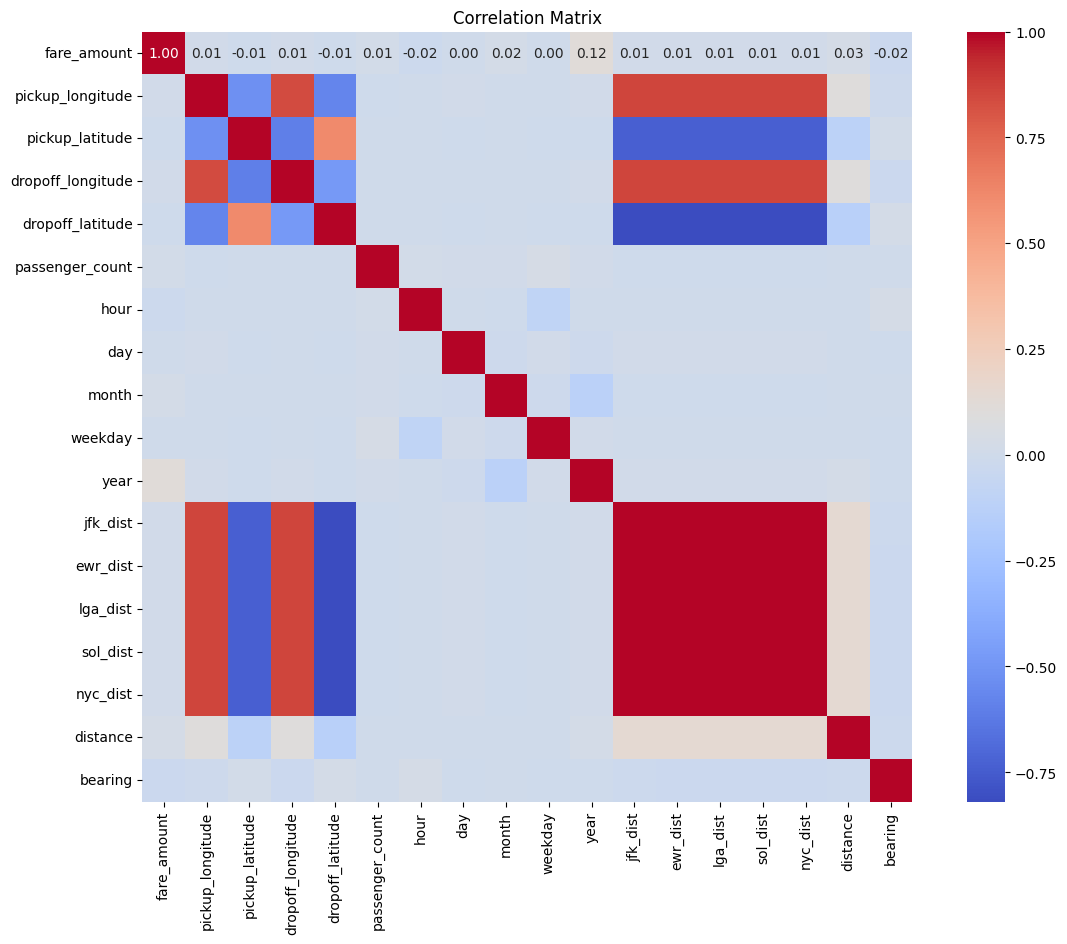

In [56]:
plt.figure(figsize=(14, 10))
corr_matrix = df[numeric_features].corr()

sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Correlation Matrix")
plt.show()

In [57]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
X_numeric = df[numeric_features].dropna()
X_scaled = StandardScaler().fit_transform(X_numeric)

vif_data = pd.DataFrame()
vif_data["Feature"] = X_numeric.columns
vif_data["VIF"] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]

print("\nVIF Table:\n", vif_data.sort_values(by="VIF", ascending=False))


VIF Table:
               Feature           VIF
14           sol_dist  1.977205e+07
15           nyc_dist  1.065316e+07
12           ewr_dist  3.596956e+06
11           jfk_dist  4.394941e+05
13           lga_dist  4.261383e+05
3   dropoff_longitude  9.470342e+00
4    dropoff_latitude  8.527962e+00
1    pickup_longitude  5.990933e+00
2     pickup_latitude  2.619573e+00
0         fare_amount  1.532729e+00
10               year  1.034852e+00
16           distance  1.028166e+00
8               month  1.016316e+00
9             weekday  1.011797e+00
6                hour  1.010956e+00
17            bearing  1.010591e+00
5     passenger_count  1.002111e+00
7                 day  1.000592e+00


In [58]:
columns_to_drop = ['pickup_longitude', 'pickup_latitude',
                   'dropoff_longitude', 'dropoff_latitude',
                   'User ID', 'User Name', 'Driver Name','pickup_datetime','key']
df = df.drop(columns=columns_to_drop, errors='ignore')

In [59]:
df = df.dropna()


In [60]:
# Remove rows where fare_amount is NaN or negative
df = df[df['fare_amount'].notna() & (df['fare_amount'] > 0)]


In [61]:
df['fare_amount'] = np.log1p(df['fare_amount'])
df['distance'] = np.log1p(df['distance'])

In [62]:
airport_dists = ['jfk_dist', 'lga_dist', 'ewr_dist', 'nyc_dist', 'sol_dist']
categorical = df.select_dtypes(include='object').columns.tolist()
numerical = df.select_dtypes(include=['int64', 'float64']).drop(columns=airport_dists + ['fare_amount']).columns.tolist()

# --- PCA for airport distances ---
pca_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('pca', PCA(n_components=1))
])

In [63]:
preprocessor = ColumnTransformer(transformers=[
    ('pca_airport', pca_transformer, airport_dists),
    ('num', 'passthrough', numerical),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical)
])

In [64]:
def build_pipeline(model):
    return Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])


In [65]:
X = df.drop(columns='fare_amount')
y = df['fare_amount']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
rf_model = build_pipeline(RandomForestRegressor(n_estimators=100, random_state=42))
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

In [69]:

from xgboost import XGBRegressor

# Train separately after preprocessing
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb.fit(X_train_transformed, y_train)
xgb_preds = xgb.predict(X_test_transformed)

In [ ]:
def evaluate(model_name, y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name}:\n  RMSE: {rmse:.2f}\n  R²: {r2:.2f}\n")

evaluate("Random Forest", y_test, rf_preds)
evaluate("XGBoost", y_test, xgb_preds)
